In [1]:
%matplotlib inline
from matplotlib import pyplot
import geopandas as gpd
import pandas as pd
import numpy as np

from weavingspace import TileUnit
from weavingspace import tiling_utils

import shapely.geometry as geom
import shapely.affinity as affine

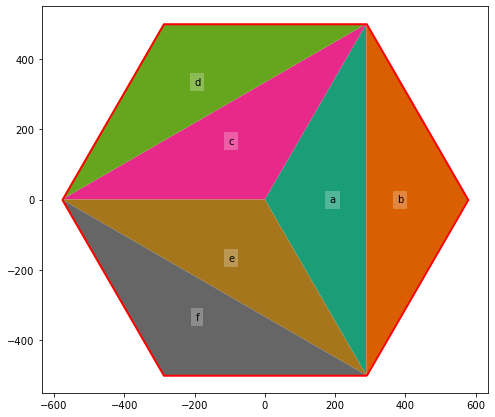

In [2]:
t = TileUnit(tiling_type = "laves", n = 6, code = "3.12.12")
t.plot()

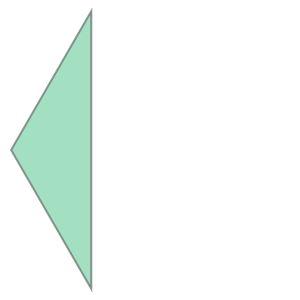

In [3]:
p = t.elements.geometry[0]
if not geom.LinearRing(p.exterior.coords).is_ccw:
    p = geom.Polygon(list(reversed(p.exterior.coords))[:-1])
p

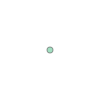

In [4]:
tiling_utils.get_angle_bisector(
    p, 2).intersection(tiling_utils.get_angle_bisector(p, 0))

In [5]:
pts = [geom.Point(x) for x in p.exterior.coords]
edges = [geom.LineString([p1, p2])
         for p1, p2 in zip(pts[:-1], pts[1:])]
midpts = [e.interpolate(0.5, normalized = True) for e in edges]
r = 2 * p.area / geom.LineString(p.exterior.coords).length
# edge_b = [e.buffer(r) for e in edges]
# edge_b = [e.buffer(r + 1e-6, cap_style = 2) for e in edges]
edge_b = [e.parallel_offset(r, side = "left") for e in edges]

In [6]:
xc = edge_b[0].intersection(edge_b[1])
# for b in edge_b[1:]:
#     x = x.intersection(b)   
# xc = x.centroid

<AxesSubplot:>

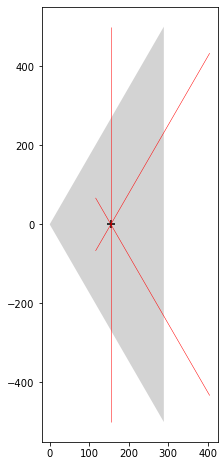

In [7]:
ax = gpd.GeoSeries([p]).plot(fc = "lightgrey", figsize = (8, 8))
gpd.GeoSeries(edge_b).plot(ax = ax, ec = "r", fc = "#00000000", lw = 0.5)
gpd.GeoSeries([xc]).plot(ax = ax, markersize = 50, marker = "+", color = "k")

In [8]:
xdash = 0.5
ydash = (3 ** 0.5) / 2
def to_diamond(poly):
    if isinstance(poly, geom.Polygon):
        return affine.affine_transform(poly, [xdash, xdash,
                                              -ydash, ydash,
                                              0, 0])
    else:
        return gpd.GeoSeries([to_diamond(p) for p in poly])

In [9]:
from weavingspace import TileShape
from weavingspace import WeaveUnit

t = TileUnit(tiling_type = "cairo")
# t = WeaveUnit(weave_type = "plain", strands = "ab|de")
t.elements.geometry = to_diamond(t.elements.geometry)
t.tile.geometry = to_diamond(t.tile.geometry)
t.regularised_tile.geometry = to_diamond(t.regularised_tile.geometry)
t.tile_shape = TileShape.DIAMOND
t.setup_vectors()

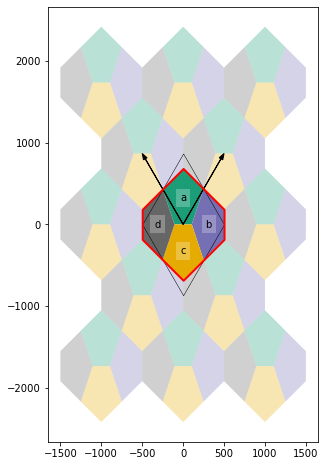

In [10]:
t.plot(r = 2, show_vectors = True)

In [14]:
-1 % 3

2